Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')
acousticness
danceability
duration_ms
energy
instrumentalness
liveness
loudness
speechiness
tempo
valence


C:\Users\reddy\AppData\Local\Temp\ipykernel_13776\1200698645.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axes[i].plot(x, p, 'k', linewidth=2, color='blue')
C:\Users\reddy\AppData\Local\Temp\ipykernel_13776\1200698645.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axes[i].plot(x, p, 'k', linewidth=2, color='red')
C:\Users\reddy\AppData\Local\Temp\ipykernel_13776\1200698645.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axes[i].plot(x, p, 'k', linewidth=2, color='blue')
C:\Users\reddy\AppData\Local\Temp\ipykernel_13776\1200698645.py:35: UserWarning: color is redundantly defined by the 'color' 

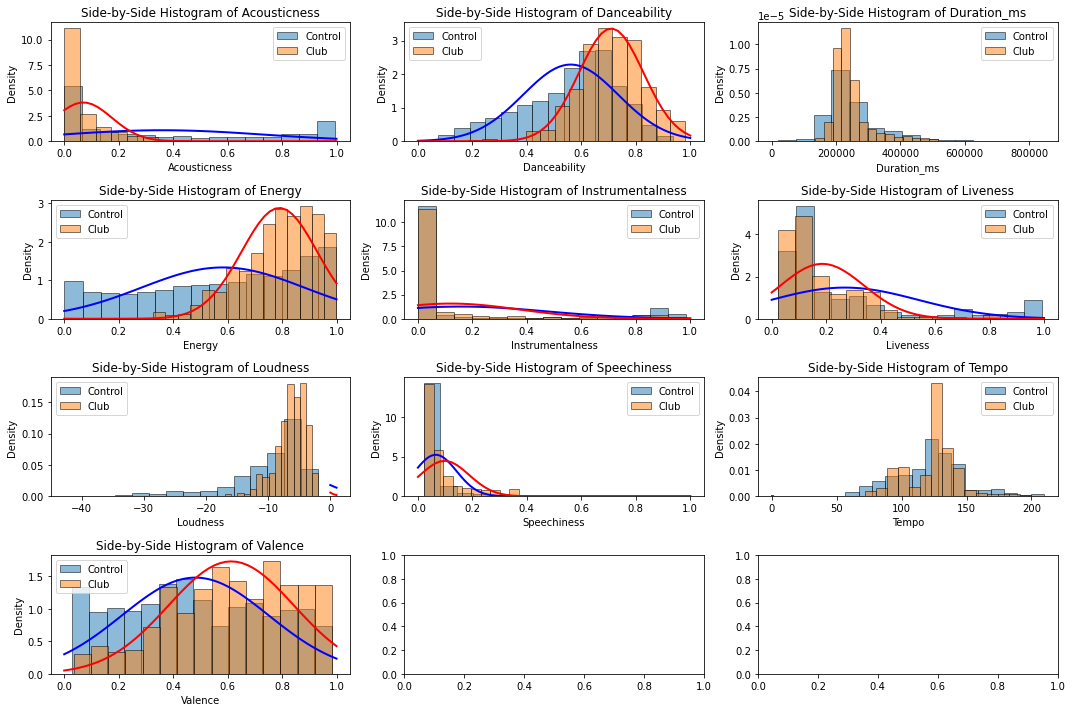

'\n    ax = bangers_df[feature].hist(bins=20, edgecolor=\'black\')  # Adjust the number of bins as needed\n    ax.set_title("bangers " + feature)\n    ax.set_xlabel(feature)\n    ax.set_ylabel(\'Frequency\')\n    plt.show()\n    bx = non_bangers_df[feature].hist(bins=20, edgecolor=\'black\')  # Adjust the number of bins as needed\n    bx.set_title("non_bangers " + feature)\n    bx.set_xlabel(feature)\n    bx.set_ylabel(\'Percentage\')\n    plt.show()\n    '

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

bangers_df = pd.read_csv("./audio_features.csv")
non_bangers_df = pd.read_csv("./NB_audio_featers.csv")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

features_list = bangers_df.iloc[:, 1:11].columns
print(features_list)

for i, feature in enumerate(features_list):
    #generate graph for each category
    #values = bangers_df[feature]
    #data = {feature: values}
    print(feature)
    #temp_df = df = pd.DataFrame(data)
    #temp_df['values'].plot.hist(bins=5, edgecolor='black')

    # Plot multiple histograms on the same plot
    axes[i].hist(non_bangers_df[feature], alpha=0.5, label='Control', bins=15, edgecolor='black', density=True)
    mu, std = norm.fit(non_bangers_df[feature])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, color='blue')
    axes[i].hist(bangers_df[feature], alpha=0.5, label='Club', bins=15, edgecolor='black', density=True)
    # Fit a normal distribution to the data
    mu, std = norm.fit(bangers_df[feature])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, color='red')

    # Set plot title and axis labels
    axes[i].set_title(f'Side-by-Side Histogram of {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Density')

    # Display legend
    axes[i].legend()

    # Display the plot
plt.tight_layout()
plt.show()


"""
    ax = bangers_df[feature].hist(bins=20, edgecolor='black')  # Adjust the number of bins as needed
    ax.set_title("bangers " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    plt.show()
    bx = non_bangers_df[feature].hist(bins=20, edgecolor='black')  # Adjust the number of bins as needed
    bx.set_title("non_bangers " + feature)
    bx.set_xlabel(feature)
    bx.set_ylabel('Percentage')
    plt.show()
    """
